In [1]:
#Kütüphaneler import edelim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("testFeatures.csv")

In [3]:
train.head(5)

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
0,2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A
1,2016-01-01,tavuk,103,et,11.22,Yurt içi,M,A
2,2016-01-01,hindi,160,et,11.12,Yurt içi,M,A
3,2016-01-01,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A
4,2016-01-01,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A


In [4]:
test.head()

,id,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir
0,0,2021-01-01,kıyma,120,et,Yurt içi,M,A
1,1,2021-01-01,tavuk,103,et,Yurt içi,M,A
2,2,2021-01-01,hindi,160,et,Yurt içi,M,A
3,3,2021-01-01,Bakla-kuru,354,sebze ve bakliyat,Yurt içi,M,A
4,4,2021-01-01,Bakla-taze,72,sebze ve bakliyat,Yurt içi,M,A


In [5]:
train.columns

Index(['tarih', 'ürün', 'ürün besin değeri', 'ürün kategorisi', 'ürün fiyatı',
       'ürün üretim yeri', 'market', 'şehir'],
      dtype='object')

In [6]:
train.dtypes[train.dtypes=="object"]

tarih               object
ürün                object
ürün kategorisi     object
ürün üretim yeri    object
market              object
şehir               object
dtype: object

In [7]:
train.dtypes[~(train.dtypes=="object")]

ürün besin değeri      int64
ürün fiyatı          float64
dtype: object

In [8]:
train.dtypes

tarih                 object
ürün                  object
ürün besin değeri      int64
ürün kategorisi       object
ürün fiyatı          float64
ürün üretim yeri      object
market                object
şehir                 object
dtype: object

In [9]:
train.isnull().sum()

tarih                0
ürün                 0
ürün besin değeri    0
ürün kategorisi      0
ürün fiyatı          0
ürün üretim yeri     0
market               0
şehir                0
dtype: int64

In [10]:
test.isnull().sum()

id                   0
tarih                0
ürün                 0
ürün besin değeri    0
ürün kategorisi      0
ürün üretim yeri     0
market               0
şehir                0
dtype: int64

In [11]:
train.describe()

,ürün besin değeri,ürün fiyatı
count,227520.000000,227520.000000
mean,143.113924,16.348622
std,133.218871,13.260935
min,8.000000,0.730000
25%,41.000000,7.330000
50%,83.000000,12.600000
75%,250.000000,20.900000
max,402.000000,141.330000


In [12]:
train.describe(include=["O"])

,tarih,ürün,ürün kategorisi,ürün üretim yeri,market,şehir
count,227520,227520,227520,227520,227520,227520
unique,60,79,6,2,3,8
top,2016-01-01,kıyma,sebze ve bakliyat,Yurt içi,M,A
freq,3792,2880,83520,113760,75840,28440


In [13]:
df=train.groupby("tarih")
for year, group in df:
    print(year)
    print(group)
    print()

2016-01-01
           tarih        ürün  ürün besin değeri    ürün kategorisi  \
0     2016-01-01       kıyma                120                 et   
1     2016-01-01       tavuk                103                 et   
2     2016-01-01       hindi                160                 et   
3     2016-01-01  Bakla-kuru                354  sebze ve bakliyat   
4     2016-01-01  Bakla-taze                 72  sebze ve bakliyat   
...          ...         ...                ...                ...   
3787  2016-01-01      fındık                110          kuruyemiş   
3788  2016-01-01      fıstık                115          kuruyemiş   
3789  2016-01-01        kaju                100          kuruyemiş   
3790  2016-01-01       badem                110          kuruyemiş   
3791  2016-01-01       ceviz                120          kuruyemiş   

      ürün fiyatı ürün üretim yeri market şehir  
0           33.41         Yurt içi      M     A  
1           11.22         Yurt içi      M     A 

In [14]:
df=train.groupby("tarih")
df.first()

,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
tarih,,,,,,,
2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A
2016-02-01,kıyma,120,et,34.08,Yurt içi,M,A
2016-03-01,kıyma,120,et,34.34,Yurt içi,M,A
2016-04-01,kıyma,120,et,34.82,Yurt içi,M,A
2016-05-01,kıyma,120,et,35.33,Yurt içi,M,A
2016-06-01,kıyma,120,et,35.79,Yurt içi,M,A
2016-07-01,kıyma,120,et,36.38,Yurt içi,M,A
2016-08-01,kıyma,120,et,36.85,Yurt içi,M,A
2016-09-01,kıyma,120,et,36.96,Yurt içi,M,A


In [15]:
cat_features =["tarih","ürün","ürün kategorisi","ürün üretim yeri","market","şehir"]
for feature in cat_features:
        print(feature)
        print(train[feature].value_counts())
        print()

tarih
2016-01-01    3792
2016-02-01    3792
2018-09-01    3792
2018-10-01    3792
2018-11-01    3792
2018-12-01    3792
2019-01-01    3792
2019-02-01    3792
2019-03-01    3792
2019-04-01    3792
2019-05-01    3792
2019-06-01    3792
2019-07-01    3792
2019-08-01    3792
2019-09-01    3792
2019-10-01    3792
2019-11-01    3792
2019-12-01    3792
2020-01-01    3792
2020-02-01    3792
2020-03-01    3792
2020-04-01    3792
2020-05-01    3792
2020-06-01    3792
2020-07-01    3792
2020-08-01    3792
2020-09-01    3792
2020-10-01    3792
2020-11-01    3792
2018-08-01    3792
2018-07-01    3792
2018-06-01    3792
2017-03-01    3792
2016-03-01    3792
2016-04-01    3792
2016-05-01    3792
2016-06-01    3792
2016-07-01    3792
2016-08-01    3792
2016-09-01    3792
2016-10-01    3792
2016-11-01    3792
2016-12-01    3792
2017-01-01    3792
2017-02-01    3792
2017-04-01    3792
2018-05-01    3792
2017-05-01    3792
2017-06-01    3792
2017-07-01    3792
2017-08-01    3792
2017-09-01    3792
2017-1

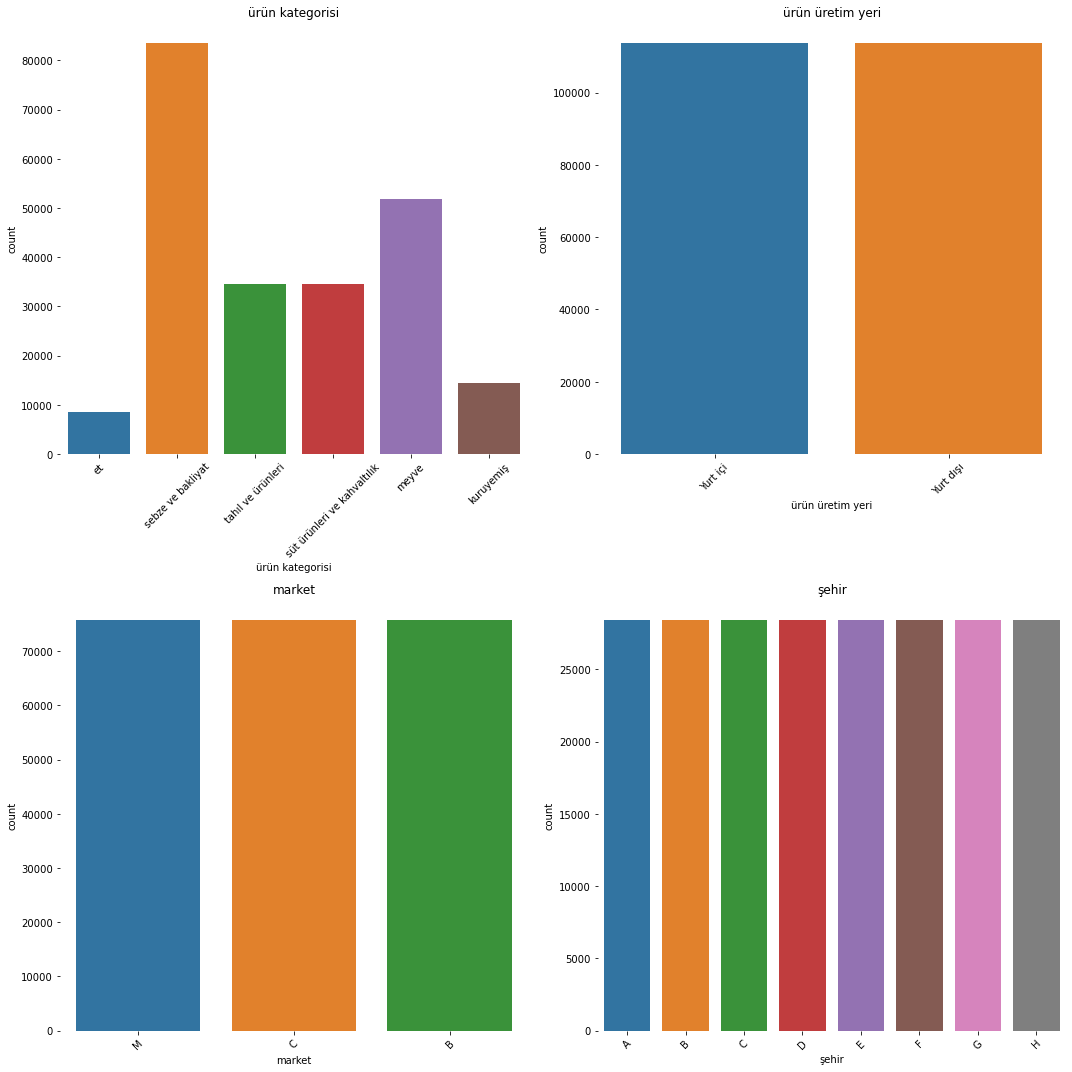

In [16]:
#Kategorik Verilerin Görselleştirilmesi
cat_features =["ürün kategorisi","ürün üretim yeri","market","şehir"]
num_rows =2
num_cols = 2
fig, ax = plt.subplots(num_cols, num_rows, figsize=(15, 15))
row = -1
for i in range(num_rows * num_cols):
    col = i % num_cols
    if col == 0:
        row += 1
    if i < len(cat_features):
        feature = cat_features[i]
        plot = sns.countplot(x=feature, data=train, ax=ax[row,col])
        plot.set_title(feature)
        plot.set_xticklabels(plot.get_xticklabels(),rotation = 45)
        sns.despine(left=True, bottom=True)
fig.tight_layout()

In [17]:
train[train["ürün kategorisi"]=="sebze ve bakliyat"].count()

tarih                83520
ürün                 83520
ürün besin değeri    83520
ürün kategorisi      83520
ürün fiyatı          83520
ürün üretim yeri     83520
market               83520
şehir                83520
dtype: int64

In [18]:
#Grafik Eklenebilir
train_copy = train.copy()

In [19]:
train_copy["tarih"] = pd.to_datetime(train_copy["tarih"],
 format = "%Y-%m-%d",
 errors = "coerce")

In [20]:
assert train_copy.tarih.isnull().sum() == 0

In [21]:
train_copy.tarih.head()

0   2016-01-01
1   2016-01-01
2   2016-01-01
3   2016-01-01
4   2016-01-01
Name: tarih, dtype: datetime64[ns]

In [22]:

train_copy['yıl'] = train_copy['tarih'].dt.year 
train_copy['ay'] = train_copy['tarih'].dt.month 

In [23]:
train_copy.groupby("yıl").size()

yıl
2016    45504
2017    45504
2018    45504
2019    45504
2020    45504
dtype: int64

In [24]:
train_copy.groupby("ay").size()

ay
1     18960
2     18960
3     18960
4     18960
5     18960
6     18960
7     18960
8     18960
9     18960
10    18960
11    18960
12    18960
dtype: int64

In [25]:
train_copy.head(5)

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,yıl,ay
0,2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A,2016,1
1,2016-01-01,tavuk,103,et,11.22,Yurt içi,M,A,2016,1
2,2016-01-01,hindi,160,et,11.12,Yurt içi,M,A,2016,1
3,2016-01-01,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A,2016,1
4,2016-01-01,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A,2016,1


In [26]:
ürün=pd.DataFrame(train_copy.groupby("ürün").mean())
ürün=train_copy["ürün fiyatı"].sort_values(ascending=True)

In [27]:
###to dict eklenecek

In [28]:
train_copy["ürün"] = train_copy["ürün"].map({'Buğday ekmeği':0,
  'Makarna':1,
  'Bulgur':2,
  'Mısır':3,
  'Pazı':4,
  'Semizotu':5,
  'Limon':6,
  'Patates':7,
  'Mandalina':8,
  'Pırasa':9,
  'Erişte':10,
  'Tarhana':11,
  'Armut':12,
   'tam buğday ekmek':13,
   'Kayısı':14,
   'Portakal':15,
   'Pilav':16,
   'Domates':17,
   'Vişne':18,
  'İncir':19,
   'Salatalık':20,
   'Nohut':21,
   'Kiraz':22,
   'Karadut':23,
   'Şeftali':24,
   'Nişasta':25,
   'Bamya':26,
   'Üzüm':27,
   'Mercimek-kuru':28,
   'Çilek':29,
   'Marul':30,
   'Elma':31,
   'Karpuz':32,
   'Barbunya-kuru':33,
   'Kereviz-baş':34,
 'Kırmızı-pancar':35,
  'Pancar':36,
  'Şehriye':37,
   'Bakla-kuru':38,
   'Erik türleri':39,
   'Pirinç unu':40,
  'Kavun':41,
   'Lahana':42,
   'yumurta':43,
   'Patlıcan':44,
   'Kabak':45,
   'Karnabahar':46,
  'Havuç':47,
   'Nar':48,
   'Muz':49,
   'krema':50,
   'Fasulye-taze':51,
  'Fasulye-kuru':52,
   'hindi':53,
  'Enginar':54,
   'tavuk':55,
   'Mısır unu':56,
   'salam':57,
   'Ispanak':58,
   'Yulaf unu':59,
  'yoğurt':60,
   'sosis':61,
   'Biber-yeşil':62,
   'Bezelye-taze':63,
   'Mantar':64,
   'Bakla-taze':65,
   'fındık':66,
   'badem':67,
   'sucuk':68,
   'fıstık':69,
   'beyaz peynir':70,
  'kaymak':71,
   'kaju':72,
   'Kaşar peyniri':73,
   'tereyağ':74,
  'ceviz':75,
  'Brüksel laha.':76,
  'bal': 77,
  'kıyma': 78})

In [107]:
train_cleaned=train_copy.copy()

In [108]:
train_cleaned.drop(["ürün üretim yeri","market","şehir"],axis=1,inplace=True)

In [109]:
train_cleaned

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,yıl,ay
0,2016-01-01,78,120,et,33.41,2016,1
1,2016-01-01,55,103,et,11.22,2016,1
2,2016-01-01,53,160,et,11.12,2016,1
3,2016-01-01,38,354,sebze ve bakliyat,7.02,2016,1
4,2016-01-01,65,72,sebze ve bakliyat,13.14,2016,1
...,...,...,...,...,...,...,...
227515,2020-12-01,66,110,kuruyemiş,51.19,2020,12
227516,2020-12-01,69,115,kuruyemiş,55.14,2020,12
227517,2020-12-01,72,100,kuruyemiş,58.60,2020,12
227518,2020-12-01,67,110,kuruyemiş,51.83,2020,12


In [110]:
columns_to_encode=["ürün kategorisi","ürün"]
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='if_binary')
encoder_df = pd.DataFrame(encoder.fit_transform(train_cleaned[columns_to_encode]).toarray())
column_names = encoder.get_feature_names(columns_to_encode)
column_names

array(['ürün kategorisi_et', 'ürün kategorisi_kuruyemiş',
       'ürün kategorisi_meyve', 'ürün kategorisi_sebze ve bakliyat',
       'ürün kategorisi_süt ürünleri ve kahvaltılık',
       'ürün kategorisi_tahıl ve ürünleri', 'ürün_0', 'ürün_1', 'ürün_2',
       'ürün_3', 'ürün_4', 'ürün_5', 'ürün_6', 'ürün_7', 'ürün_8',
       'ürün_9', 'ürün_10', 'ürün_11', 'ürün_12', 'ürün_13', 'ürün_14',
       'ürün_15', 'ürün_16', 'ürün_17', 'ürün_18', 'ürün_19', 'ürün_20',
       'ürün_21', 'ürün_22', 'ürün_23', 'ürün_24', 'ürün_25', 'ürün_26',
       'ürün_27', 'ürün_28', 'ürün_29', 'ürün_30', 'ürün_31', 'ürün_32',
       'ürün_33', 'ürün_34', 'ürün_35', 'ürün_36', 'ürün_37', 'ürün_38',
       'ürün_39', 'ürün_40', 'ürün_41', 'ürün_42', 'ürün_43', 'ürün_44',
       'ürün_45', 'ürün_46', 'ürün_47', 'ürün_48', 'ürün_49', 'ürün_50',
       'ürün_51', 'ürün_52', 'ürün_53', 'ürün_54', 'ürün_55', 'ürün_56',
       'ürün_57', 'ürün_58', 'ürün_59', 'ürün_60', 'ürün_61', 'ürün_62',
       'ürün_63', 'ürü

In [111]:
encoder_df.columns = column_names

In [112]:
train_cleaned.drop(columns=columns_to_encode, inplace=True, axis=1)
train_cleaned = train_cleaned.join(encoder_df)

In [113]:
train_cleaned.drop(["tarih"],axis=1
                  ,inplace=True)

In [114]:
cal1=train_cleaned["ürün fiyatı"]/train_cleaned["ürün besin değeri"]

In [115]:
train_cleaned["cal1"]=cal1

In [116]:
train_cleaned.drop(["ürün fiyatı"],axis=1,inplace=True)

In [117]:
train_cleaned

,ürün besin değeri,yıl,ay,ürün kategorisi_et,ürün kategorisi_kuruyemiş,ürün kategorisi_meyve,ürün kategorisi_sebze ve bakliyat,ürün kategorisi_süt ürünleri ve kahvaltılık,ürün kategorisi_tahıl ve ürünleri,ürün_0,...,ürün_70,ürün_71,ürün_72,ürün_73,ürün_74,ürün_75,ürün_76,ürün_77,ürün_78,cal1
0,120,2016,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.278417
1,103,2016,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.108932
2,160,2016,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069500
3,354,2016,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019831
4,72,2016,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.182500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227515,110,2020,12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.465364
227516,115,2020,12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.479478
227517,100,2020,12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.586000
227518,110,2020,12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.471182


In [118]:
# Kolerasyon matrixinde mutlak değerlerin çıkarılması
corr_matrix = train_cleaned.corr().abs()
corr_matrix.head()

,ürün besin değeri,yıl,ay,ürün kategorisi_et,ürün kategorisi_kuruyemiş,ürün kategorisi_meyve,ürün kategorisi_sebze ve bakliyat,ürün kategorisi_süt ürünleri ve kahvaltılık,ürün kategorisi_tahıl ve ürünleri,ürün_0,...,ürün_70,ürün_71,ürün_72,ürün_73,ürün_74,ürün_75,ürün_76,ürün_77,ürün_78,cal1
ürün besin değeri,1.000000e+00,8.727801e-15,2.964368e-15,2.303777e-02,6.266106e-02,3.554438e-01,2.996964e-01,1.952754e-01,6.773532e-01,8.829686e-02,...,5.852746e-03,1.758406e-01,3.664422e-02,2.285153e-02,1.970891e-01,1.964543e-02,8.169100e-02,2.183376e-01,1.964543e-02,0.516270
yıl,8.727801e-15,1.000000e+00,3.256290e-13,1.025847e-15,3.550655e-15,3.264245e-15,6.194398e-15,5.522648e-16,1.297287e-15,4.424320e-17,...,6.230308e-16,6.181652e-17,2.375027e-16,6.713727e-16,3.779370e-16,9.993220e-17,5.814135e-16,2.342933e-17,6.011196e-16,0.297729
ay,2.964368e-15,3.256290e-13,1.000000e+00,2.660363e-16,2.648747e-16,3.175882e-16,1.747635e-15,2.848221e-16,9.917547e-17,7.902529e-17,...,2.138316e-17,8.622461e-17,2.223237e-16,1.945191e-17,1.181765e-16,1.878632e-16,7.900301e-17,1.242829e-16,9.366781e-17,0.062218
ürün kategorisi_et,2.303777e-02,1.025847e-15,2.660363e-16,1.000000e+00,5.164437e-02,1.079258e-01,1.513101e-01,8.408278e-02,8.408278e-02,2.249606e-02,...,2.249606e-02,2.249606e-02,2.249606e-02,2.249606e-02,2.249606e-02,2.249606e-02,2.249606e-02,2.249606e-02,5.699003e-01,0.017018
ürün kategorisi_kuruyemiş,6.266106e-02,3.550655e-15,2.648747e-16,5.164437e-02,1.000000e+00,1.412019e-01,1.979626e-01,1.100075e-01,1.100075e-01,2.943214e-02,...,2.943214e-02,2.943214e-02,4.355957e-01,2.943214e-02,2.943214e-02,4.355957e-01,2.943214e-02,2.943214e-02,2.943214e-02,0.004459


In [119]:
# Kolerasyon üçgeninin oluşturulması
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

C:\Users\akdog\AppData\Local\Temp/ipykernel_11384/271855056.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,ürün besin değeri,yıl,ay,ürün kategorisi_et,ürün kategorisi_kuruyemiş,ürün kategorisi_meyve,ürün kategorisi_sebze ve bakliyat,ürün kategorisi_süt ürünleri ve kahvaltılık,ürün kategorisi_tahıl ve ürünleri,ürün_0,...,ürün_70,ürün_71,ürün_72,ürün_73,ürün_74,ürün_75,ürün_76,ürün_77,ürün_78,cal1
ürün besin değeri,NaN,8.727801e-15,2.964368e-15,2.303777e-02,6.266106e-02,3.554438e-01,2.996964e-01,1.952754e-01,6.773532e-01,8.829686e-02,...,5.852746e-03,1.758406e-01,3.664422e-02,2.285153e-02,1.970891e-01,1.964543e-02,8.169100e-02,2.183376e-01,1.964543e-02,0.516270
yıl,NaN,NaN,3.256290e-13,1.025847e-15,3.550655e-15,3.264245e-15,6.194398e-15,5.522648e-16,1.297287e-15,4.424320e-17,...,6.230308e-16,6.181652e-17,2.375027e-16,6.713727e-16,3.779370e-16,9.993220e-17,5.814135e-16,2.342933e-17,6.011196e-16,0.297729
ay,NaN,NaN,NaN,2.660363e-16,2.648747e-16,3.175882e-16,1.747635e-15,2.848221e-16,9.917547e-17,7.902529e-17,...,2.138316e-17,8.622461e-17,2.223237e-16,1.945191e-17,1.181765e-16,1.878632e-16,7.900301e-17,1.242829e-16,9.366781e-17,0.062218
ürün kategorisi_et,NaN,NaN,NaN,NaN,5.164437e-02,1.079258e-01,1.513101e-01,8.408278e-02,8.408278e-02,2.249606e-02,...,2.249606e-02,2.249606e-02,2.249606e-02,2.249606e-02,2.249606e-02,2.249606e-02,2.249606e-02,2.249606e-02,5.699003e-01,0.017018
ürün kategorisi_kuruyemiş,NaN,NaN,NaN,NaN,NaN,1.412019e-01,1.979626e-01,1.100075e-01,1.100075e-01,2.943214e-02,...,2.943214e-02,2.943214e-02,4.355957e-01,2.943214e-02,2.943214e-02,4.355957e-01,2.943214e-02,2.943214e-02,2.943214e-02,0.004459


In [120]:
# Özniteliklerin silinme threshold'u
# Bu öznitelikler sadece tek boyutta bakılıyor. Nonlineeri anlayamaz.
threshold = 0.8

In [121]:
# Thresholdun üzerindeki korelasyonların seçilmesi
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('Silinecek kolon sayısı %d :' % (len(to_drop)))
print(to_drop)

Silinecek kolon sayısı 0 :
[]


Silinecek Kolon Yoktur

In [122]:
train_cleaned["cal1"]

0         0.278417
1         0.108932
2         0.069500
3         0.019831
4         0.182500
            ...   
227515    0.465364
227516    0.479478
227517    0.586000
227518    0.471182
227519    0.476833
Name: cal1, Length: 227520, dtype: float64

In [191]:
#### Başarım Ölçüm Fonksiyonları

In [192]:
#### Veri Hazırlığı

In [123]:
train_cleaned

,ürün besin değeri,yıl,ay,ürün kategorisi_et,ürün kategorisi_kuruyemiş,ürün kategorisi_meyve,ürün kategorisi_sebze ve bakliyat,ürün kategorisi_süt ürünleri ve kahvaltılık,ürün kategorisi_tahıl ve ürünleri,ürün_0,...,ürün_70,ürün_71,ürün_72,ürün_73,ürün_74,ürün_75,ürün_76,ürün_77,ürün_78,cal1
0,120,2016,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.278417
1,103,2016,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.108932
2,160,2016,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069500
3,354,2016,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019831
4,72,2016,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.182500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227515,110,2020,12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.465364
227516,115,2020,12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.479478
227517,100,2020,12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.586000
227518,110,2020,12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.471182


In [124]:
y_data = train_cleaned['cal1']
X_data = train_cleaned.drop(columns=['cal1'])

In [125]:
X_data.shape

(227520, 88)

In [126]:
print(X_data.shape)
print(y_data.shape)
assert X_data.shape[0] == y_data.shape[0]

(227520, 88)
(227520,)


In [127]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_data.values,
    y_data.values,
    test_size = 0.15,
    random_state = 42
)

In [128]:
X_train

array([[  42., 2018.,    9., ...,    0.,    0.,    0.],
       [ 110., 2019.,    5., ...,    0.,    0.,    0.],
       [  49., 2018.,    4., ...,    0.,    0.,    0.],
       ...,
       [ 160., 2018.,   11., ...,    0.,    0.,    0.],
       [ 346., 2019.,    3., ...,    0.,    0.,    0.],
       [  93., 2018.,    9., ...,    0.,    0.,    0.]])

In [129]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [130]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)

In [131]:
X_train

array([[0.08629442, 0.5       , 0.72727273, ..., 0.        , 0.        ,
        0.        ],
       [0.25888325, 0.75      , 0.36363636, ..., 0.        , 0.        ,
        0.        ],
       [0.10406091, 0.5       , 0.27272727, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.3857868 , 0.5       , 0.90909091, ..., 0.        , 0.        ,
        0.        ],
       [0.85786802, 0.75      , 0.18181818, ..., 0.        , 0.        ,
        0.        ],
       [0.21573604, 0.5       , 0.72727273, ..., 0.        , 0.        ,
        0.        ]])

In [132]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [133]:
X_train.shape

(193392, 88)

In [147]:
from tensorflow.keras.models import Sequential
model=Sequential()
model.add(Dense(units=87,activation="sigmoid"))
model.add(Dense(units=35,activation="sigmoid"))
model.add(Dense(units=35, activation="sigmoid"))
model.add(Dense(units=1))
model.compile(optimizer="adam",loss="mse")
earlyStopping=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

In [148]:
model.fit(X_train,y_train, epochs=300,batch_size=1000,validation_data= (X_val,y_val),verbose=1,callbacks=[earlyStopping])

Epoch 1/300
194/194 [==============================] - 1s 4ms/step - loss: 0.0687 - val_loss: 0.0202
Epoch 2/300
194/194 [==============================] - 1s 3ms/step - loss: 0.0120 - val_loss: 0.0075
Epoch 3/300
194/194 [==============================] - 1s 3ms/step - loss: 0.0054 - val_loss: 0.0033
Epoch 4/300
194/194 [==============================] - 1s 3ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 5/300
194/194 [==============================] - 1s 3ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 6/300
194/194 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 9.8157e-04
Epoch 7/300
194/194 [==============================] - 1s 3ms/step - loss: 9.3210e-04 - val_loss: 8.6964e-04
Epoch 8/300
194/194 [==============================] - 1s 3ms/step - loss: 8.7436e-04 - val_loss: 8.2734e-04
Epoch 9/300
194/194 [==============================] - 1s 4ms/step - loss: 8.4882e-04 - val_loss: 8.3554e-04
Epoch 10/300
194/194 [==============================] - 1s 3ms/

In [149]:
kayipVerisi=pd.DataFrame(model.history.history)

<AxesSubplot:>

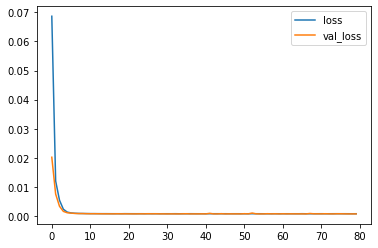

In [150]:
kayipVerisi.plot()

In [151]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [152]:
tahminDizisi=model.predict(X_val)

1067/1067 [==============================] - 1s 911us/step


In [153]:
tahminDizisi

array([[0.04139795],
       [0.28948504],
       [0.00788464],
       ...,
       [0.22259003],
       [0.18185392],
       [0.06659313]], dtype=float32)

In [154]:
mean_absolute_error(y_val,tahminDizisi)

0.01348453542159541

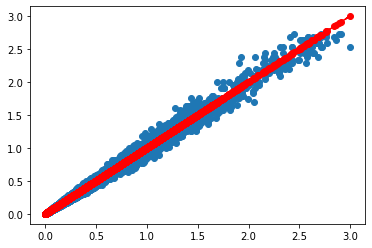

In [155]:
plt.scatter(y_val,tahminDizisi)
plt.plot(y_val,y_val,"o--r")

In [156]:
deneme=pd.DataFrame(y_val)

In [157]:
deneme["tahmin"]=tahminDizisi

In [158]:
deneme[0].mean()

0.2679793474195307

In [159]:
deneme["tahmin"].mean()

0.2651319205760956

In [164]:
deneme[0]=deneme[0]*train_cleaned["ürün besin değeri"]
deneme["tahmin"]=deneme["tahmin"]*train_cleaned["ürün besin değeri"]


In [98]:
df=pd.read_csv("testFeatures.csv")
df.drop(["ürün üretim yeri","market","şehir"],axis=1,inplace=True)
import datetime
df["tarih"] = pd.to_datetime(df["tarih"],
 format = "%Y-%m-%d",
 errors = "coerce")
df['yıl'] = df['tarih'].dt.year 
df['ay'] = df['tarih'].dt.month 

In [99]:
df

,id,tarih,ürün,ürün besin değeri,ürün kategorisi,yıl,ay
0,0,2021-01-01,kıyma,120,et,2021,1
1,1,2021-01-01,tavuk,103,et,2021,1
2,2,2021-01-01,hindi,160,et,2021,1
3,3,2021-01-01,Bakla-kuru,354,sebze ve bakliyat,2021,1
4,4,2021-01-01,Bakla-taze,72,sebze ve bakliyat,2021,1
...,...,...,...,...,...,...,...
45499,45499,2021-12-01,fındık,110,kuruyemiş,2021,12
45500,45500,2021-12-01,fıstık,115,kuruyemiş,2021,12
45501,45501,2021-12-01,kaju,100,kuruyemiş,2021,12
45502,45502,2021-12-01,badem,110,kuruyemiş,2021,12


In [100]:
df["ürün"] = df["ürün"].map({'Buğday ekmeği':0,
  'Makarna':1,
  'Bulgur':2,
  'Mısır':3,
  'Pazı':4,
  'Semizotu':5,
  'Limon':6,
  'Patates':7,
  'Mandalina':8,
  'Pırasa':9,
  'Erişte':10,
  'Tarhana':11,
  'Armut':12,
   'tam buğday ekmek':13,
   'Kayısı':14,
   'Portakal':15,
   'Pilav':16,
   'Domates':17,
   'Vişne':18,
  'İncir':19,
   'Salatalık':20,
   'Nohut':21,
   'Kiraz':22,
   'Karadut':23,
   'Şeftali':24,
   'Nişasta':25,
   'Bamya':26,
   'Üzüm':27,
   'Mercimek-kuru':28,
   'Çilek':29,
   'Marul':30,
   'Elma':31,
   'Karpuz':32,
   'Barbunya-kuru':33,
   'Kereviz-baş':34,
 'Kırmızı-pancar':35,
  'Pancar':36,
  'Şehriye':37,
   'Bakla-kuru':38,
   'Erik türleri':39,
   'Pirinç unu':40,
  'Kavun':41,
   'Lahana':42,
   'yumurta':43,
   'Patlıcan':44,
   'Kabak':45,
   'Karnabahar':46,
  'Havuç':47,
   'Nar':48,
   'Muz':49,
   'krema':50,
   'Fasulye-taze':51,
  'Fasulye-kuru':52,
   'hindi':53,
  'Enginar':54,
   'tavuk':55,
   'Mısır unu':56,
   'salam':57,
   'Ispanak':58,
   'Yulaf unu':59,
  'yoğurt':60,
   'sosis':61,
   'Biber-yeşil':62,
   'Bezelye-taze':63,
   'Mantar':64,
   'Bakla-taze':65,
   'fındık':66,
   'badem':67,
   'sucuk':68,
   'fıstık':69,
   'beyaz peynir':70,
  'kaymak':71,
   'kaju':72,
   'Kaşar peyniri':73,
   'tereyağ':74,
  'ceviz':75,
  'Brüksel laha.':76,
  'bal': 77,
  'kıyma': 78})

In [101]:

columns_to_encode=["ürün kategorisi","ürün"]
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='if_binary')
encoder_df = pd.DataFrame(encoder.fit_transform(df[columns_to_encode]).toarray())
column_names = encoder.get_feature_names(columns_to_encode)
column_names
encoder_df.columns = column_names
df.drop(columns=columns_to_encode, inplace=True, axis=1)
df =df.join(encoder_df)

In [102]:
df["ürün besin değeri"]

0        120
1        103
2        160
3        354
4         72
        ... 
45499    110
45500    115
45501    100
45502    110
45503    120
Name: ürün besin değeri, Length: 45504, dtype: int64

In [103]:
p_data =df.drop(columns=["id","tarih"])

In [104]:
p_data.shape

(45504, 88)

In [105]:
p_data

,ürün besin değeri,yıl,ay,ürün kategorisi_et,ürün kategorisi_kuruyemiş,ürün kategorisi_meyve,ürün kategorisi_sebze ve bakliyat,ürün kategorisi_süt ürünleri ve kahvaltılık,ürün kategorisi_tahıl ve ürünleri,ürün_0,...,ürün_69,ürün_70,ürün_71,ürün_72,ürün_73,ürün_74,ürün_75,ürün_76,ürün_77,ürün_78
0,120,2021,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,103,2021,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,160,2021,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,354,2021,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,72,2021,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45499,110,2021,12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45500,115,2021,12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45501,100,2021,12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
45502,110,2021,12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
c=model.predict(p_data)

1422/1422 [==============================] - 1s 749us/step


In [88]:
dfn=pd.DataFrame(df["id"])

In [89]:
dfn["cal1"]=c

In [91]:
dfn["ürün fiyatı"]=df["ürün besin değeri"]*dfn["cal1"]

In [93]:
dfn.drop(["cal1"],axis=1,inplace=True)

In [94]:
dfn

,id,ürün fiyatı
0,0,109.642146
1,1,39.873570
2,2,44.650698
3,3,34.660668
4,4,44.504469
...,...,...
45499,45499,68.287700
45500,45500,68.309888
45501,45501,71.460843
45502,45502,66.518387
